<a href="https://colab.research.google.com/github/sahilgoyal7214/practice-c/blob/main/Tutorial_7/T7_SDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial-7: Implement Gradient Descent for Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

# Preprocessing Input data
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data
#X = data.iloc[:, 0]
#Y = data.iloc[:, 1]
#plt.scatter(X, Y)
#plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


<Axes: >

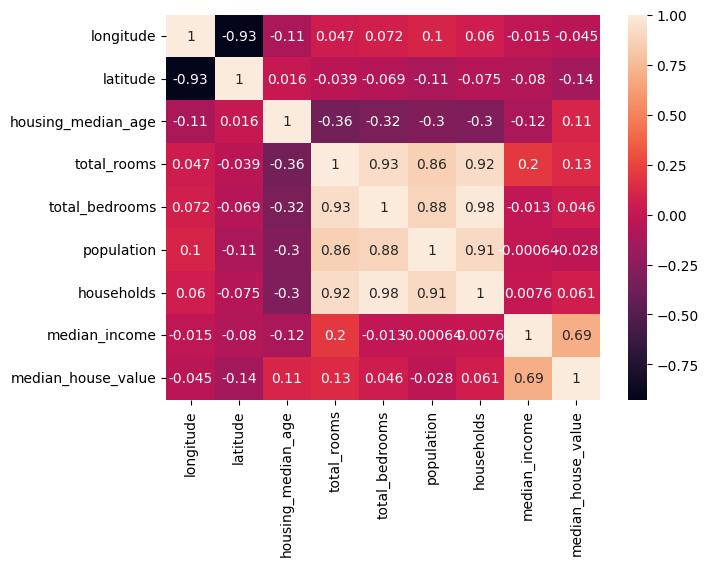

In [ ]:
#compute correlation
import seaborn
seaborn.heatmap(data.corr(),annot=True)

In [ ]:
#Choose covariate & output for linear regression
X=data['median_income']
Y=data['median_house_value']

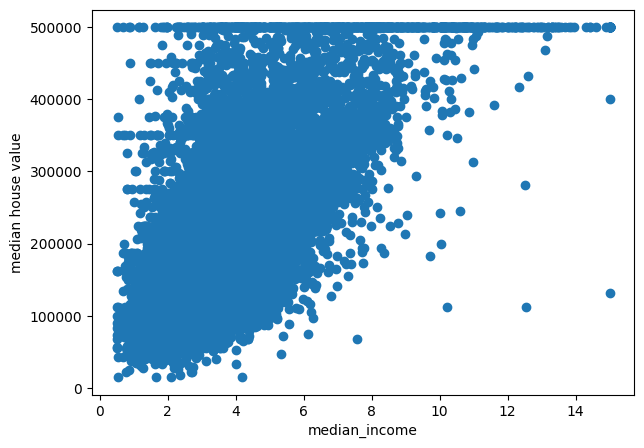

In [ ]:
plt.scatter(X, Y)
plt.xlabel('median_income')
plt.ylabel('median house value')
plt.show()

In [ ]:

def gradient_descent(X,Y,epochs):
    # Performing Gradient Descent 
    theta_1 = 2
    theta_0 = 1.5
    w1=[]
    w0=[]

    alpha = 0.0001  # The learning Rate
    #epochs = 1000  # The number of iterations to perform gradient descent

    n = int(len(X)) # Number of elements in X

    cost=[]
    for i in range(epochs): 
    #print('Current Iteration {}'.format(i+1))
        Y_pred = theta_1*X + theta_0  # The current predicted value of Y
        cost.append(1/n*sum([val**2 for val in (Y-Y_pred)]))
        D_theta_1 = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt theta_1
        D_theta_0 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt theta_0
        theta_1 = theta_1 - alpha*D_theta_1  # Update theta_1
        theta_0 = theta_0 - alpha*D_theta_0  # Update theta_0
        w1.append(theta_1)
        w0.append(theta_0)
        if i>1:
           if (w1[i]-w1[i-1]<0.01) or (w0[i]-w0[i-1]<0.01):
              break 
    return theta_0,theta_1,cost,w0,w1,i



In [ ]:
theta_0,theta_1,cost,w0,w1,i=gradient_descent(X,Y,500)

In [ ]:
print("The optimal value of theta_0 and theta_1 is ",theta_0,theta_1)

The optimal value of theta_0 and theta_1 is  9459.633482739337 42047.11787980741


In [ ]:
print("Optimization completed in",i+1,"epochs")

Optimization completed in 500 epochs


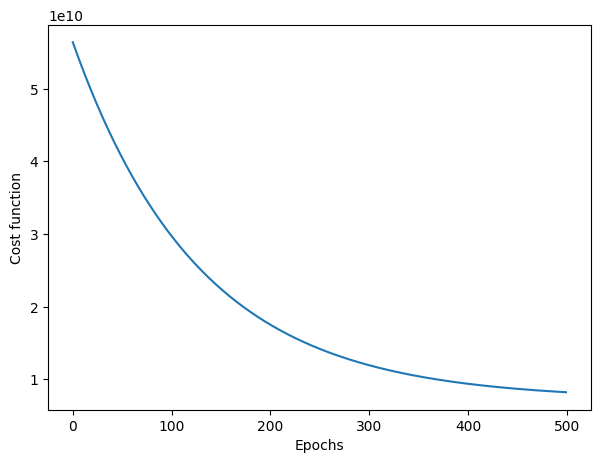

In [ ]:
plt.plot(np.arange(0,500,1),cost)
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.show()

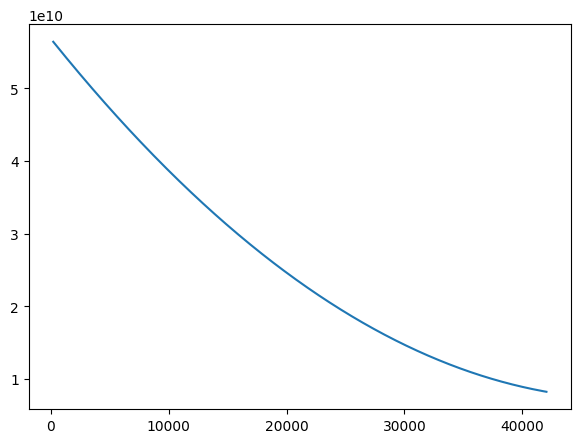

In [ ]:
plt.plot()